<a href="https://colab.research.google.com/github/hello-maker/Pan-genome-Analysis/blob/main/Pan_Genome_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Data Processing

In [3]:
!pip install Bio
from Bio import SeqIO
record = SeqIO.parse("/content/gdrive/My Drive/Colab Notebooks/논문/sequence.gb", 'genbank') 
country = []
description = []
for seq in record:
  seq_feature = seq.features[0].qualifiers
  if ('country' in seq_feature.keys()) == True: 
    if len(seq.seq) > 100000:
      #print(seq_feature['country'][0],'-', seq.description)
      country.append(seq_feature['country'][0])
      description.append(seq.description)

In [4]:
# virus isolate strain
selection_decrption = []
index_list = []
for index, d in enumerate(description):
  d = d.split(',')[0]
  if ('strain' in d) == True:
    s = d.split('strain')[1]
    selection_decrption.append(s)
    index_list.append(index)
  elif ('isolate' in d) == True:
    i = d.split('isolate')[1]
    selection_decrption.append(i)
    index_list.append(index)
  else:  
    selection_decrption.append('?')
    index_list.append(94)

In [5]:
selection_decrption[-1] = 'Benin 97/1'
selection_decrption[-2] = 'OURT 88/3'
selection_decrption[-3] = 'Benin 97/1'
selection_decrption[-4] = 'OURT 88/3'

In [6]:
len(selection_decrption), len(country)

(100, 100)

In [7]:
count_dic = dict(zip(selection_decrption, country))
# 첫 번째 ? : 이름이 아예 없음
# 두,세 번째 ? : E75

In [8]:
import pandas as pd
ortholog = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/논문/otholog.csv", header=1)

In [9]:
new = []
for i in selection_decrption:
  if ('/' in i) == True:
    i = i.replace('/', '_')
    new.append(i)
  else:
    new.append(i)
### ### ###
new_ = []
for i in new:
  new_.append(i.lstrip())
### ### ###
new__ = []
for i in new_:
  if (' ' in i) == True:
    i = i.replace(' ', '_')
    new__.append(i)
  else:
    new__.append(i)
### ### ###
new___ = []
for i in new__:
  new___.append('ASF_'+i)
print(new___)

['ASF_BUR_18_Rutana', 'ASF_Ken06.Bus', 'ASF_Ken05_Tk1', 'ASF_Ken06.Bus', 'ASF_Ken05_Tk1', 'ASF_Belgium_Etalle_wb_2018', 'ASF_China_2018_AnhuiXCGQ', 'ASF_MAL_19_Karonga', 'ASF_ASFV_Kyiv_2016_131', 'ASF_K49', 'ASF_Uvira_B53', 'ASF_Liv13_33_(OmLF2)', 'ASF_ASFV-SY18', 'ASF_47_Ss_2008', 'ASF_ASFV_POL_2015_Podlaskie', 'ASF_47_Ss_2008', 'ASF_ASFV_Kabardino-Balkaria_19_WB-964', 'ASF_CN_2019_InnerMongolia-AES01', 'ASF_ASFV_HU_2018', 'ASF_ASFV-wbBS01', 'ASF_Georgia_2008_1', 'ASF_ASFV_Ulyanovsk_19_WB-5699', 'ASF_ASFV_Primorsky_19_WB-6723', 'ASF_ASFV_Amur_19_WB-6905', 'ASF_VNUA-ASFV-05L1_HaNam_VN_2020', 'ASF_?', 'ASF_NHV', 'ASF_L60', 'ASF_22653_Ca_2014', 'ASF_97_Ot_2012', 'ASF_72407_Ss_2005', 'ASF_26_Ss_2004', 'ASF_60_Nu_1997', 'ASF_142_Nu_1995', 'ASF_141_Nu_1990', 'ASF_85_Ca_1985', 'ASF_140_Or_1985', 'ASF_139_Nu_1981', 'ASF_57_Ca_1979', 'ASF_56_Ca_1978', 'ASF_DB_LN_2018', 'ASF_Pig_HLJ_2018', 'ASF_Pol17_05838_C220', 'ASF_Pol17_04461_C210', 'ASF_Pol17_03029_C201', 'ASF_Pol16_29413_o23', 'ASF_Pol16_

In [10]:
count_dic_rename = dict(zip(new___, country))

In [11]:
len(count_dic_rename)
#new__
#country
for i in ortholog.columns:
  if (i in count_dic_rename.keys()) == False:
    print(i)

ASF_26544_OG10
ASF_Arm_07_CBM_c4
ASF_ASF_Kyiv_2016_131
ASF_ASFV-wbB501
ASF_ASFV_CzechRepublic_2017_1
ASF_ASFV_East_Timor_2019_1
ASF_ASFV_Georgia_2007_1
ASF_ASFV_Germany_2020_1
ASF_ASFV_Moldova_2017_1
ASF_BA71
ASF_BA71V
ASF_Belgium_2018_1
ASF_E75
ASF_Estonia_2014
ASF_Georgia_2007_1
ASF_Ken06_Bus
ASF_KEN_rie1
ASF_Kenya_1950
ASF_Liv13_33_OmLF2
ASF_Malawi_Lil-20_1_1983


In [12]:
#key -> dataframe col
#ASF_26544_OG10_from_Italy -> ASF_26544_OG10 (Italy)
#ASF_ASFV_Kyiv_2016_131 -> ASF_ASF_Kyiv_2016_131 (Kyiv)
#ASF_ASFV_Timor-Leste_2019_1 -> ASF_ASFV_East_Timor_2019_1 (East_Timor)
#ASF_ASFV_CzechRepublic_2017_1 -> 새로 생성 (CzechRepublic)
#ASF_ASFV_Georgia_2007_1 -> 새로 생성 (Georgia)
#ASF_ASFV_Germany_2020_1 -> 새로 생성 (Germany)
#ASF_ASFV_Moldova_2017_1 -> 새로 생성 (Moldova)
#ASF_E75 -> 새로 생성 (Spain)
#ASF_Belgium_2018_1 -> 새로 생성 (Belgium)
#ASF_Estonia_2014 -> 새로 생성 (Estonia)
#ASF_Georgia_2007_1 -> 새로 생성 (Georgia)
#ASF_Ken06_Bus -> 새로 생성 (Kenya)
#ASF_KEN_rie1 -> 새로 생성 (Kenya)
#ASF_Kenya_1950 -> 새로 생성 (Kenya)
#ASF_Liv13_33_(OmLF2) -> ASF_Liv13_33_OmLF2 (France)
#ASF_Malawi_Lil-20_1_1983 -> 새로 생성(Malawi)

In [13]:
count_dic_rename['ASF_26544_OG10'] = 'Italy'
count_dic_rename['ASF_ASF_Kyiv_2016_131'] = 'Kyiv'
count_dic_rename['ASF_ASFV_East_Timor_2019_1'] = 'East_Timor'
count_dic_rename['ASF_ASFV_CzechRepublic_2017_1'] = 'CzechRepublic'
count_dic_rename['ASF_ASFV_Georgia_2007_1'] = 'Georgia'
count_dic_rename['ASF_ASFV_Germany_2020_1'] = 'Germany'
count_dic_rename['ASF_ASFV_Moldova_2017_1'] = 'Moldova'
count_dic_rename['ASF_E75'] = 'Spain'
count_dic_rename['ASF_Belgium_2018_1'] = 'Belgium'
count_dic_rename['ASF_Estonia_2014'] = 'Estonia'
count_dic_rename['ASF_Georgia_2007_1'] = 'Georgia'
count_dic_rename['ASF_Ken06_Bus'] = 'Kenya'
count_dic_rename['ASF_KEN_rie1'] = 'Kenya'
count_dic_rename['ASF_Kenya_1950'] = 'Kenya'
count_dic_rename['ASF_Liv13_33_OmLF2'] = 'France'
count_dic_rename['ASF_Malawi_Lil-20_1_1983'] = 'Malawi'

In [14]:
# ortholog 각 columns에 해당하는 나라를 대응시켜야 함!!

In [15]:
a = list(count_dic_rename.keys()).index('ASF_26544_OG10')
count_dic_rename[list(count_dic_rename.keys())[84]]

'Italy'

In [16]:
new_ortholog_col = []
for i in ortholog.columns:
  if (i in count_dic_rename.keys()) == True:
    key_ind = list(count_dic_rename.keys()).index(i)
    match_country = count_dic_rename[list(count_dic_rename.keys())[key_ind]]
    new_ortholog_col.append(match_country)
  else:
    new_ortholog_col.append(i)


In [17]:
ortholog.columns = new_ortholog_col
ortholog.head()

,"Italy: Nuoro, Sardinia","Italy: Oristano, Sardinia","Italy: Nuoro, Sardinia","Italy: Nuoro, Sardinia","Italy: Cagliari, Sardinia",Italy,"Italy: Sassari, Sardinia","Italy: Province of Sassari, Sardinia","Italy: Cagliari, Sardinia","Italy: Cagliari, Sardinia","Italy: Nuoro, Sardinia","Italy: Sassari, Sardinia","Italy: Cagliari, Sardinia","Italy: Olbia-Tempio, Sardinia",ASF_Arm_07_CBM_c4,Kyiv,China,ASF_ASFV-wbB501,CzechRepublic,East_Timor,Georgia,Germany,Viet Nam,Hungary,Russia,South Korea: PaJu,Lithuania,Moldova,Viet Nam,China: Zhuhai,Poland,China,China,ASF_BA71,ASF_BA71V,Belgium,Belgium,Benin,China,China,...,Kenya,Kenya,Kenya,Portugal,France,Zambia,Malawi,South Africa: Mkuzi Game Reserve,Uganda: Tororo district,Portugal,Russia,Portugal,China,China,Poland,Poland,Poland,Poland,Poland,Poland,Poland,Poland,Poland,Poland,Poland,South Africa: Kruger National Park,Uganda: Tororo district,Uganda: Tororo district,Uganda: Tororo district,Uganda: Tororo district,South Africa,South Africa,South Africa,South Africa,"Malawi: Tengani, Nsanje District",Democratic Republic of the Congo,Viet Nam,South Africa: Warmbaths,Namibia,Zaire
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,...,0,0,0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0
2,1,1,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,...,0,0,0,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


Euro
Asia
Amer
Afri





In [18]:
import numpy as np
np.unique(list(ortholog.columns))[4:]
# Afri Amer Asia Euro
# 0     1     2   3

array(['Belgium', 'Benin', 'China', 'China: Zhuhai', 'CzechRepublic',
       'Democratic Republic of the Congo', 'East_Timor', 'Estonia',
       'France', 'Georgia', 'Germany', 'Hungary', 'Italy',
       'Italy: Cagliari, Sardinia', 'Italy: Nuoro, Sardinia',
       'Italy: Olbia-Tempio, Sardinia', 'Italy: Oristano, Sardinia',
       'Italy: Province of Sassari, Sardinia', 'Italy: Sassari, Sardinia',
       'Kenya', 'Kyiv', 'Lithuania', 'Malawi',
       'Malawi: Tengani, Nsanje District', 'Moldova', 'Namibia', 'Poland',
       'Portugal', 'Russia', 'South Africa',
       'South Africa: Kruger National Park',
       'South Africa: Mkuzi Game Reserve', 'South Africa: Warmbaths',
       'South Korea: PaJu', 'Spain', 'Uganda: Tororo district',
       'Viet Nam', 'Zaire', 'Zambia'], dtype='<U36')

In [19]:
import numpy as np
# Afri Amer Asia Euro
# 0     1     2   3
a = [3, 0, 2, 2, 3, 0, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0 , 3, 3, 0, 0, 3, 0, 3, 3, 2,
     0, 0, 0, 0, 2, 3, 0, 2, 0, 0]
b = np.unique(list(ortholog.columns))[4:].tolist()
match_dic = dict(zip(b, a))
conti_list = []
for i in list(ortholog.columns):
  if (i in match_dic.keys()) == True:
    conti_list.append(match_dic[i])
  else:
    conti_list.append(1)
c = ['Afri', 'Amer', 'Asia', 'Euro']
conti = []
for i in conti_list:
  conti.append(c[i])

In [20]:
ortholog_conti = ortholog.copy()
ortholog_conti.columns = conti
ortholog_conti.head()

,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Amer,Euro,Asia,Amer,Euro,Asia,Asia,Euro,Asia,Euro,Asia,Asia,Euro,Euro,Asia,Asia,Euro,Asia,Asia,Amer,Amer,Euro,Euro,Afri,Asia,Asia,...,Afri,Afri,Afri,Euro,Euro,Afri,Afri,Afri,Afri,Euro,Asia,Euro,Asia,Asia,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Afri,Afri,Afri,Afri,Afri,Afri,Afri,Afri,Afri,Afri,Afri,Asia,Afri,Afri,Afri
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,...,0,0,0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0
2,1,1,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,...,0,0,0,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [21]:
ortholog_conti_ = ortholog_conti.copy()
ortholog_conti = ortholog_conti.drop('Amer', axis = 1)
ortholog_conti.head()

,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Asia,Euro,Asia,Asia,Euro,Asia,Euro,Asia,Asia,Euro,Euro,Asia,Asia,Euro,Asia,Asia,Euro,Euro,Afri,Asia,Asia,Asia,Asia,Euro,Euro,...,Afri,Afri,Afri,Euro,Euro,Afri,Afri,Afri,Afri,Euro,Asia,Euro,Asia,Asia,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Euro,Afri,Afri,Afri,Afri,Afri,Afri,Afri,Afri,Afri,Afri,Afri,Asia,Afri,Afri,Afri
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0
2,1,1,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [22]:
Afri = ortholog_conti['Afri'].sum(1)/len(ortholog_conti['Afri'].columns)*100
Asia = ortholog_conti['Asia'].sum(1)/len(ortholog_conti['Asia'].columns)*100
Euro = ortholog_conti['Euro'].sum(1)/len(ortholog_conti['Euro'].columns)*100
conti_df = pd.DataFrame([Afri, Asia, Euro]).T
conti_df.columns = ['Afri', 'Asia', 'Euro'] 
conti_df

,Afri,Asia,Euro
0,47.826087,100.000000,100.0
1,30.434783,100.000000,100.0
2,0.000000,0.000000,35.0
3,100.000000,100.000000,100.0
4,13.043478,95.454545,97.5
...,...,...,...
600,43.478261,0.000000,0.0
601,13.043478,100.000000,60.0
602,13.043478,0.000000,2.5
603,8.695652,0.000000,0.0


In [23]:
new_ortholog = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/논문/ortholog.csv", header=1, index_col=0)
conti_df.index = new_ortholog.index
conti_df

,Afri,Asia,Euro
Ortholog_1_I9R_I9R_CDS,47.826087,100.000000,100.0
Ortholog_10_B475L_B475L_CDS_BA71V_B475L,30.434783,100.000000,100.0
Ortholog_100_DP93R_KP93L,0.000000,0.000000,35.0
Ortholog_101_S183L_2_S183L_1_S183L_CDS_BA71V_S183_i5L,100.000000,100.000000,100.0
Ortholog_102_MGF_360_4L_MGF_360_4L_CDS,13.043478,95.454545,97.5
...,...,...,...
Ortholog_95_E146L,43.478261,0.000000,0.0
Ortholog_96_ACD_01940,13.043478,100.000000,60.0
Ortholog_97_None,13.043478,0.000000,2.5
Ortholog_98_BA71V_I177L_k14L,8.695652,0.000000,0.0


# Pan-genome Analysis

Text(0, 0.5, 'Number of gene')

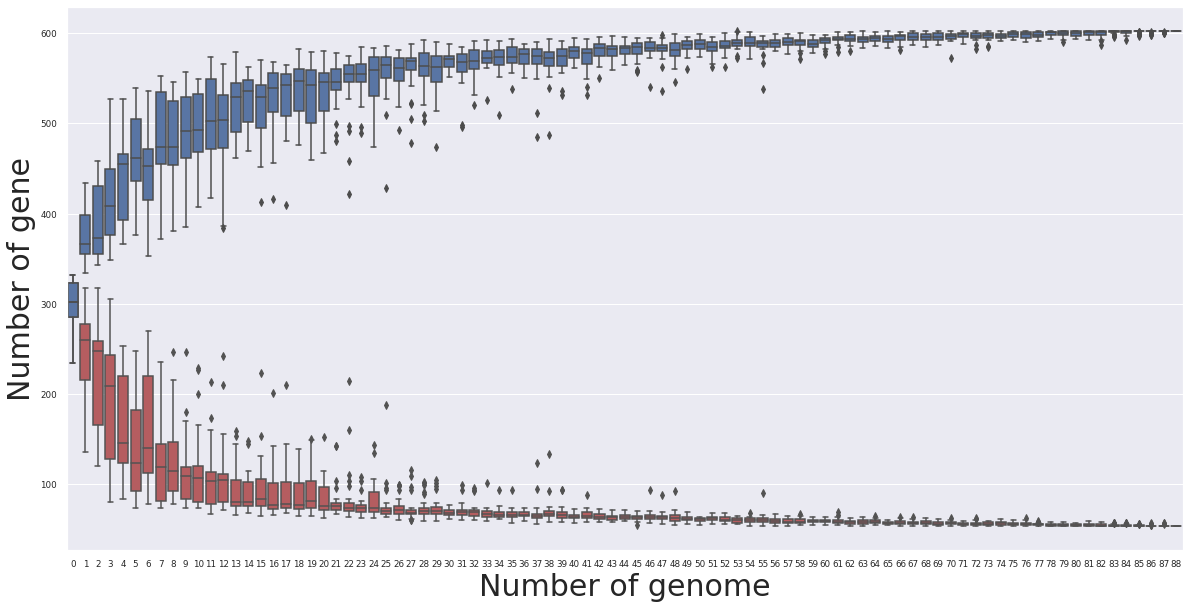

In [24]:
core_count_df = pd.DataFrame(columns=['Number of genome', "Number of gene"])
total_count_df = pd.DataFrame(columns=['Number of genome', "Number of gene"])
genome_list = range(89)
import random
_ = 0
for i in range(89):
  total_list = []
  acc_list = []
  for j in range(30):
    random_col = random.sample(genome_list, i+1)
    boot_df = new_ortholog[new_ortholog.columns[random_col]]
    
    total = sum(boot_df.sum(1) > 0) 
    total_count_df.loc[_] = [i, total]

    core = sum(boot_df.sum(1) == i+1)
    acc = total - core    
    core_count_df.loc[_] = [i, core]
    _ += 1
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.set(font_scale=0.8)
sns.boxplot(x = 'Number of genome', y = 'Number of gene', data = core_count_df, color = 'r')
sns.boxplot(x = 'Number of genome', y = 'Number of gene', data = total_count_df, color = 'b')
plt.xlabel('Number of genome', fontsize=30)
plt.ylabel('Number of gene', fontsize=30)


# Validation

In [25]:
def count_df(genome_cnt):
  core_count_df = pd.DataFrame(columns=['Number of genome', "Number of gene"])
  total_count_df = pd.DataFrame(columns=['Number of genome', "Number of gene"])
  genome_list = range(89)
  _ = 0
  for i in range(genome_cnt):
    total_list = []
    acc_list = []
    for j in range(20):
      random_col = random.sample(genome_list, i+1)
      boot_df = new_ortholog[new_ortholog.columns[random_col]]
      
      total = sum(boot_df.sum(1) > 0) 
      total_count_df.loc[_] = [i, total]

      core = sum(boot_df.sum(1) == i+1)
      acc = total - core    
      core_count_df.loc[_] = [i, core]
      _ += 1
  a =  total_count_df[total_count_df['Number of genome']==(genome_cnt-1)]['Number of gene'].astype('float').values
  b =  core_count_df[core_count_df['Number of genome']==(genome_cnt-1)]['Number of gene'].astype('float').values
  total_ratio = 0
  for i  in range(len(a)):
    ratio = b[i]/a[i]
    total_ratio += ratio
  return total_count_df, core_count_df, total_ratio/len(a)
t, c , v = count_df(46)
#c.tail(20)

In [26]:
total_count_df[total_count_df['Number of genome']==(38-1)]['Number of gene'].astype('float').values

array([567., 584., 579., 585., 571., 590., 567., 581., 589., 567., 580.,
       566., 549., 557., 584., 579., 577., 583., 585., 570., 579., 512.,
       587., 583., 558., 560., 572., 567., 566., 485.])

In [27]:
genome_cnt=46

In [28]:
a =  total_count_df[total_count_df['Number of genome']==(genome_cnt-1)]['Number of gene'].astype('float').values
b =  core_count_df[core_count_df['Number of genome']==(genome_cnt-1)]['Number of gene'].astype('float').values
total_ratio = 0
for i  in range(len(a)):
  ratio = b[i]/a[i]
  total_ratio += ratio
total_ratio/len(a)

0.1079731111001167

Acc/Total Ratio :  0.1133100297265582
Acc/Total Ratio :  0.1080846744921687


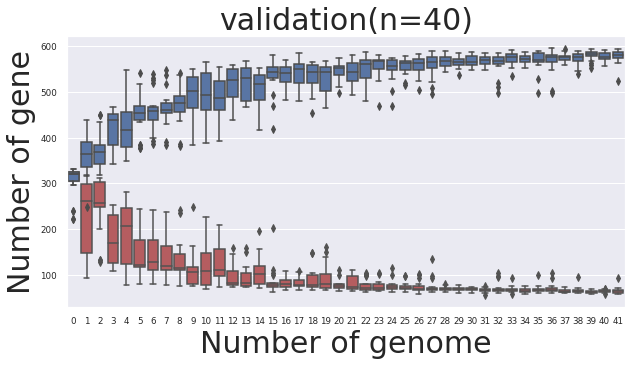

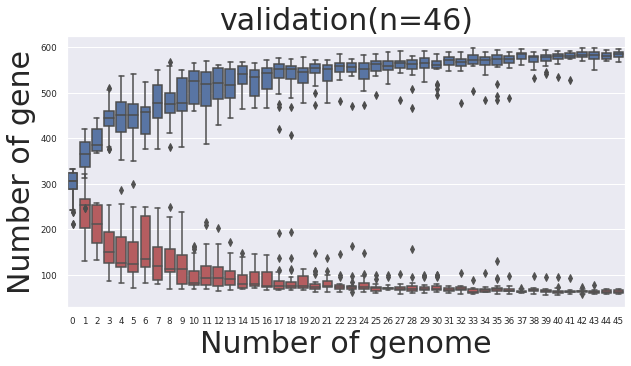

In [29]:
a, b, value = count_df(42)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.set(font_scale=0.8)
sns.boxplot(x = 'Number of genome', y = 'Number of gene', data = b, color = 'r')
sns.boxplot(x = 'Number of genome', y = 'Number of gene', data = a, color = 'b')
plt.xlabel('Number of genome', fontsize=30)
plt.ylabel('Number of gene', fontsize=30)
plt.title("validation(n=40)", fontsize=30)
print("Acc/Total Ratio : ", value)


a, b, value = count_df(46)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.set(font_scale=0.8)
sns.boxplot(x = 'Number of genome', y = 'Number of gene', data = b, color = 'r')
sns.boxplot(x = 'Number of genome', y = 'Number of gene', data = a, color = 'b')
plt.xlabel('Number of genome', fontsize=30)
plt.ylabel('Number of gene', fontsize=30)
plt.title("validation(n=46)", fontsize=30)
print("Acc/Total Ratio : ", value)

In [ ]:
ratio_list = []
for i  in range(100):
  a, b, value = count_df(42)
  #print(value)
  ratio_list.append(value)
sns.histplot(np.log(ratio_list))
print('(n=40) acc/total ratio : ', np.mean(ratio_list))

In [ ]:
ratio_list = []
for i  in range(100):
  a, b, value = count_df(46)
  #print(value)
  ratio_list.append(value)
sns.histplot(ratio_list)
print('(n=40) acc/total ratio : ', np.mean(ratio_list))

 # Outlier Genome 찾아보기

In [31]:
def count_df(genome_cnt):
  ratio_list = []
  for k in range(89):
    out_ortholog = new_ortholog.copy()
    out_index = list(range(89))
    out_index.remove(k)
    out_ortholog = out_ortholog.iloc[:,out_index]
    core_count_df = pd.DataFrame(columns=['Number of genome', "Number of gene"])
    total_count_df = pd.DataFrame(columns=['Number of genome', "Number of gene"])
    genome_list = range(88)
    _ = 0
    for i in range(genome_cnt-1, genome_cnt):
      total_list = []
      acc_list = []
      for j in range(10):
        random_col = random.sample(genome_list, i+1)
        boot_df = out_ortholog[out_ortholog.columns[random_col]]
        
        total = sum(boot_df.sum(1) > 0) 
        total_count_df.loc[_] = [i, total]

        core = sum(boot_df.sum(1) == i+1)
        acc = total - core    
        core_count_df.loc[_] = [i, core]
        _ += 1
    total_gene_cnt = total_count_df[total_count_df['Number of genome']==(genome_cnt-1)]['Number of gene'].astype('float').mean()
    core_gene_cnt = core_count_df[core_count_df['Number of genome']==(genome_cnt-1)]['Number of gene'].astype('float').mean()
    ratio_list.append(core_gene_cnt/total_gene_cnt)
  return core_gene_cnt, ratio_list

c, outlier_ratio = count_df(46)

Min :  0.10161702127659575
Max :  0.11734960767218831


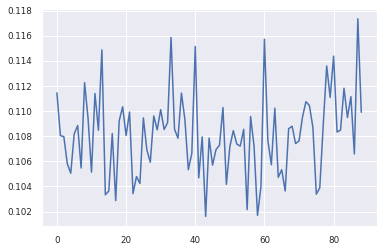

In [32]:
sns.lineplot(x=list(range(len(outlier_ratio))),y=outlier_ratio)
print("Min : ", np.min(outlier_ratio))
print("Max : ",np.max(outlier_ratio))

# 지역 특이적 유전자 선별

In [33]:
new_index_list = []
for i in conti_df.index:
  ii = i.split('_')[:2]
  new_index_list.append("_".join(ii))
conti_df.index = new_index_list

In [ ]:
[conti_df.columns[0], conti_df.columns[1]]

['Afri', 'Asia']

In [34]:
def gene_count(max, min):
  cnt = 0
  gene_list = []
  conti_list = []
  col = conti_df.columns
  for i in range(605):
    if conti_df.iloc[i,:][0] > max:
      if conti_df.iloc[i,:][1] > max and conti_df.iloc[i,:][2] < min:
        cnt += 1
        gene_list.append(i)
        conti_list.append([col[0], col[1]])

      elif conti_df.iloc[i,:][1] < min and conti_df.iloc[i,:][2] > max:
        cnt += 1
        gene_list.append(i)
        conti_list.append([col[0], col[2]])
      
      elif conti_df.iloc[i,:][1] < min and conti_df.iloc[i,:][1] < min:
        cnt += 1
        gene_list.append(i)
        conti_list.append([col[0]])

    if conti_df.iloc[i,:][0] < min:
      if conti_df.iloc[i,:][1] > max and conti_df.iloc[i,:][2] > max:
        cnt += 1 
        gene_list.append(i)
        conti_list.append([col[1], col[2]])
      elif conti_df.iloc[i,:][1] < min and conti_df.iloc[i,:][2] > max:
        cnt += 1
        gene_list.append(i)
        conti_list.append([col[2]])
      elif conti_df.iloc[i,:][1] > max and conti_df.iloc[i,:][1] < min:
        cnt += 1  
        gene_list.append(i)
        conti_list.append([col[1]])
  gene_list = conti_df.index[gene_list]
  return cnt, gene_list, conti_list

In [36]:
max_list = [90, 80, 70]
min_list = [10, 20, 30]
for max in range(3):
  for min in range(3):
    cnt, gene_list, conti_list = gene_count(max_list[max], min_list[min])
    print(max_list[max], min_list[min], "->" ,cnt)

90 10 -> 4
90 20 -> 11
90 30 -> 22
80 10 -> 5
80 20 -> 12
80 30 -> 25
70 10 -> 6
70 20 -> 13
70 30 -> 28


In [37]:
cnt, gene_list, conti_list = gene_count(80, 25)
len(gene_list), len(conti_list)

(18, 18)

지역별 특이적 유전자 확인

In [38]:
def gene_count_only(max, min):
  cnt = 0
  afri_list = []
  asia_list = []
  euro_list = []
  for i in range(605):
    if conti_df.iloc[i,:][0] > max:
      if conti_df.iloc[i,:][1] < min and conti_df.iloc[i,:][2] < min:
        cnt += 1
        afri_list.append(i) 

    if conti_df.iloc[i,:][1] > max:
      if conti_df.iloc[i,:][0] < min and conti_df.iloc[i,:][2] < min:
        cnt += 1
        asia_list.append(i) 

    if conti_df.iloc[i,:][2] > max:
      if conti_df.iloc[i,:][0] < min and conti_df.iloc[i,:][1] < min:
        cnt += 1
        euro_list.append(i)         


  afri_list = list(conti_df.index[afri_list])
  asia_list = list(conti_df.index[asia_list])
  euro_list = list(conti_df.index[euro_list])

  return afri_list, asia_list, euro_list

max_list = [80, 70, 60]
min_list = [10, 20, 30]
for max in range(len(max_list)):
  for min in range(len(min_list)):
    print(max_list[max], min_list[min], "->" ,gene_count_only(max_list[max], min_list[min]))

80 10 -> (['Ortholog_144'], [], [])
80 20 -> (['Ortholog_144'], [], [])
80 30 -> (['Ortholog_144'], [], [])
70 10 -> (['Ortholog_144', 'Ortholog_42'], [], [])
70 20 -> (['Ortholog_144', 'Ortholog_42'], [], [])
70 30 -> (['Ortholog_144', 'Ortholog_42'], [], [])
60 10 -> (['Ortholog_144', 'Ortholog_42', 'Ortholog_460'], [], [])
60 20 -> (['Ortholog_144', 'Ortholog_253', 'Ortholog_42', 'Ortholog_460'], [], ['Ortholog_58'])
60 30 -> (['Ortholog_144', 'Ortholog_253', 'Ortholog_42', 'Ortholog_460'], [], ['Ortholog_58'])


In [ ]:
#ortholog.index = new_index_list

# Phylogenetic Tree

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(10, 15), dpi = 100) #, dpi = 1000
sns.set(font_scale=0.8)
dend = shc.dendrogram(shc.linkage(ortholog_conti.T, method='weighted'), orientation='left', labels=ortholog_conti.columns.tolist(), color_threshold = 0)
print(dend['ivl'])

In [ ]:
#ortholog_conti = ortholog.copy()
#ortholog_conti.columns = conti
plt.figure(figsize=(8, 10), dpi = 100)
#linked = linkage(dendro_ortholog, 'single')
dend = shc.dendrogram(shc.linkage(ortholog_conti.T, method='ward'), orientation='left', labels=ortholog_conti.columns.tolist(), color_threshold = 0)

Genome Name(Amer X, Not match)

In [ ]:
method = ['single', 'median', 'ward', 'centroid', 'weighted', 'average', 'complete']
#plt.figure(figsize=(8, 10), dpi = 100)
#linked = linkage(dendro_ortholog, 'single')

ivl_list = []
for i in method:
  plt.figure(figsize=(4, 8), dpi = 100)
  dend = shc.dendrogram(shc.linkage(ortholog_conti.T, method=i), orientation='left', labels=new_ortholog.columns.tolist(), color_threshold = 0)
  ivl_list.append(dend['ivl'])

Continent Name

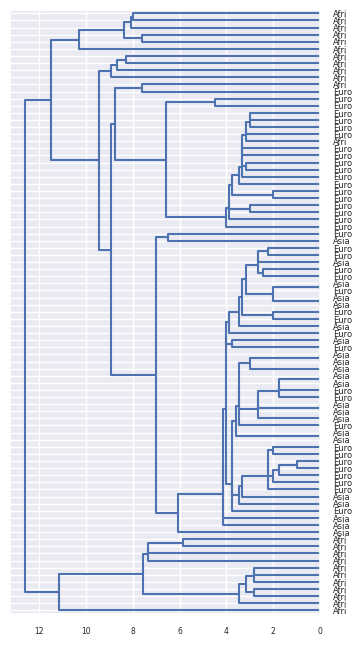

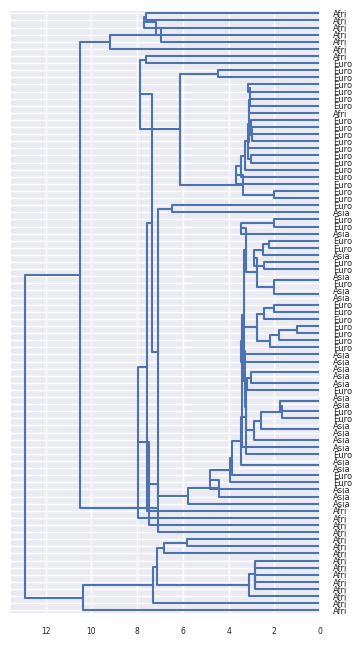

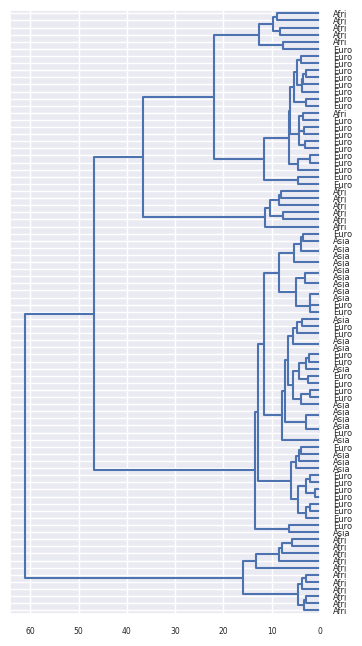

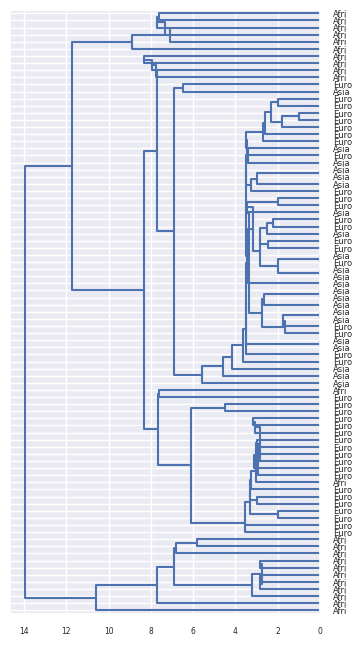

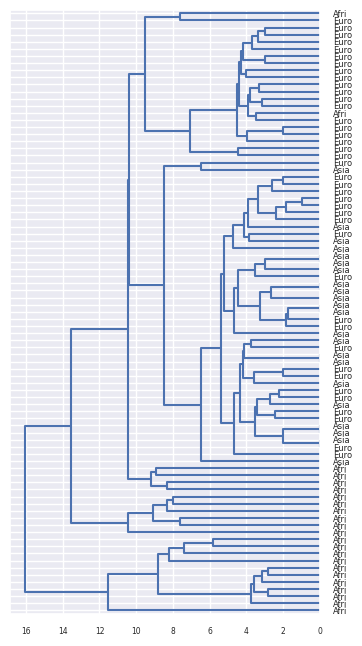

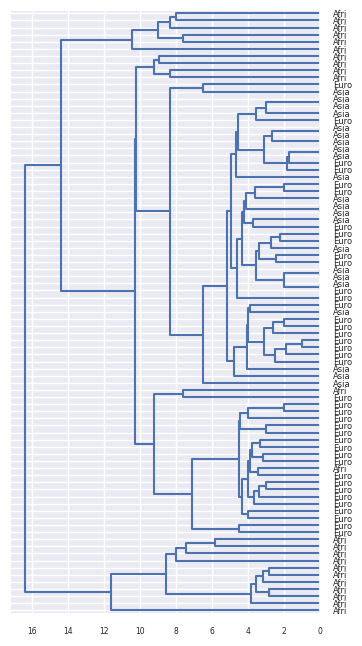

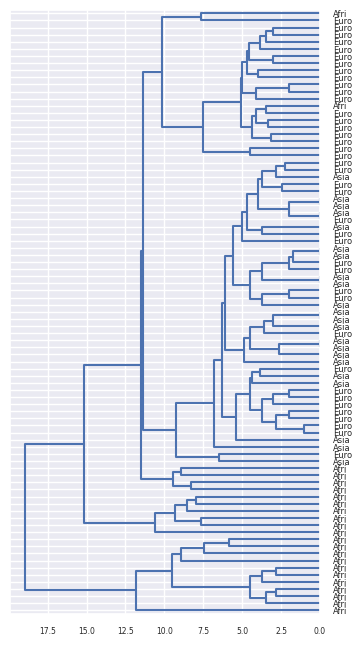

In [ ]:
method = ['single', 'median', 'ward', 'centroid', 'weighted', 'average', 'complete']
#plt.figure(figsize=(8, 10), dpi = 100)
#linked = linkage(dendro_ortholog, 'single')

ivl_list = []
for i in method:
  plt.figure(figsize=(4, 8), dpi = 100)
  dend = shc.dendrogram(shc.linkage(ortholog_conti.T, method=i), orientation='left', labels=ortholog_conti.columns.tolist(), color_threshold = 0)
  ivl_list.append(dend['ivl'])

Genome Name(Amer 0, match)

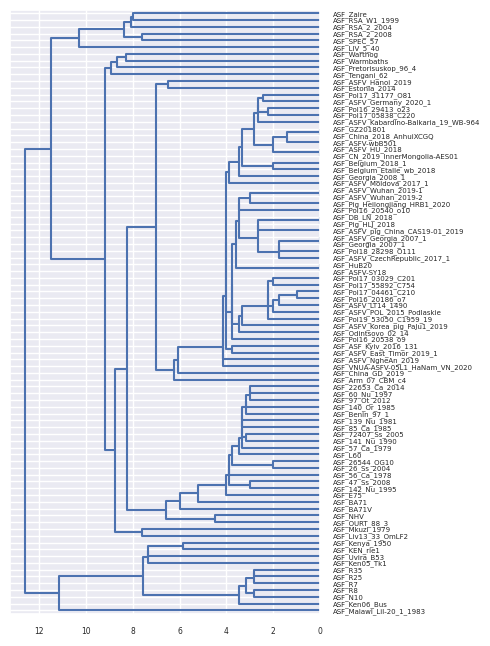

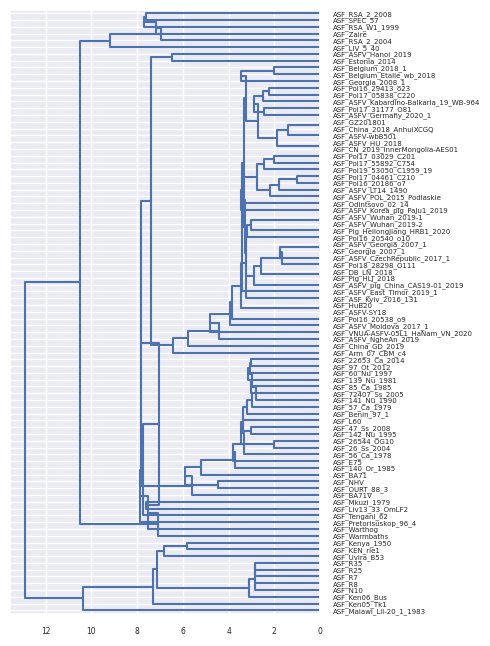

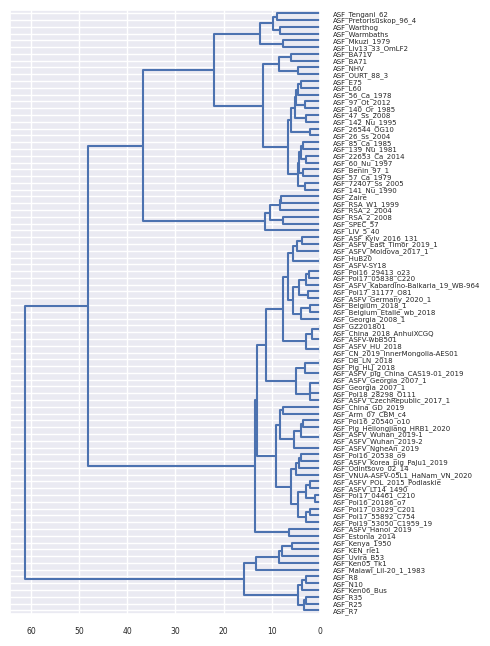

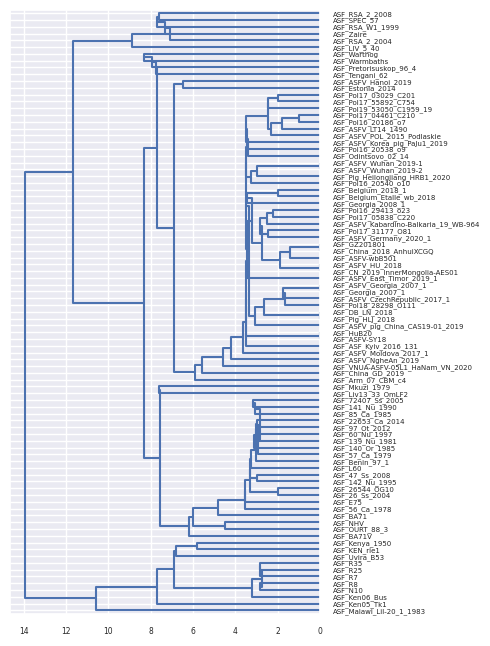

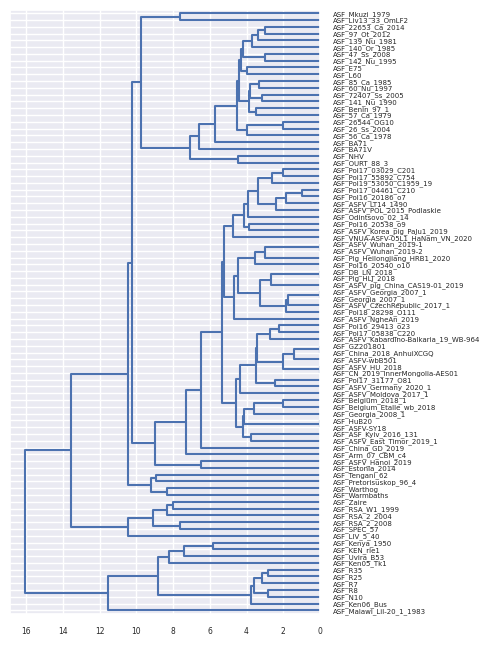

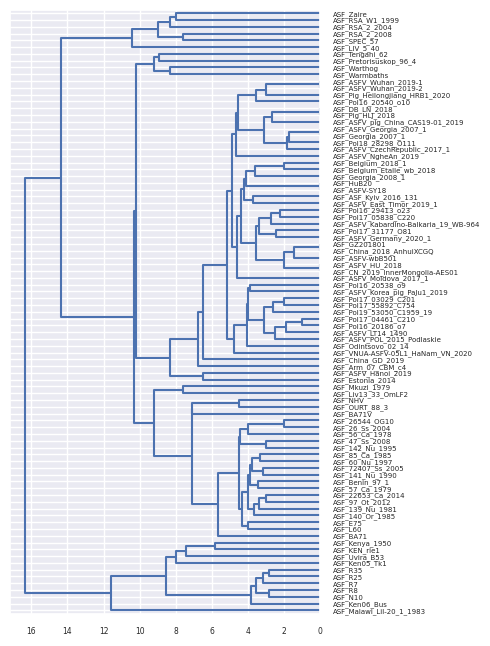

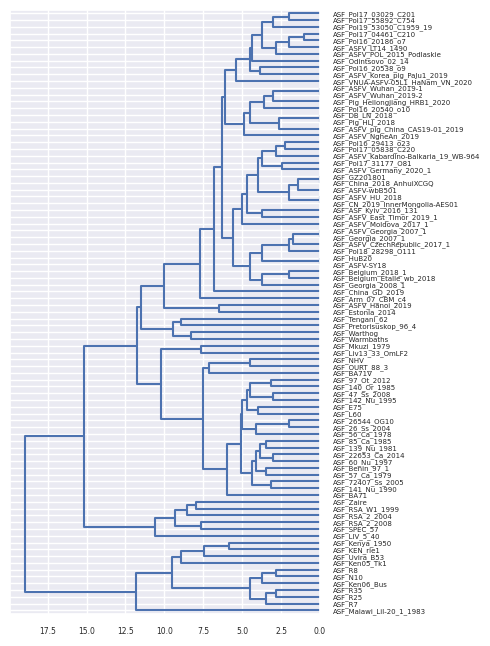

In [ ]:
method = ['single', 'median', 'ward', 'centroid', 'weighted', 'average', 'complete']
#plt.figure(figsize=(8, 10), dpi = 100)
#linked = linkage(dendro_ortholog, 'single')

ivl_list = []
for i in method:
  plt.figure(figsize=(4, 8), dpi = 100)
  dend = shc.dendrogram(shc.linkage(gene_name.T, method=i), orientation='left', labels=gene_name.columns.tolist(), color_threshold = 0)
  ivl_list.append(dend['ivl'])

# Profiling of Absence and Presence

In [ ]:
ivl_list[4]

In [ ]:
conti_name = ortholog_conti_
gene_name = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/논문/otholog.csv", header=1)

In [ ]:
new_index_list = []
for i in conti_df.index:
  ii = i.split('_')[:2]
  new_index_list.append("_".join(ii))
conti_df.index = new_index_list
gene_name.index = new_index_list
conti_name.index = new_index_list

In [ ]:
exp = gene_name.T
exp = exp.loc[exp.sum(1).sort_values(ascending=False).index, :]
gene_name = exp.T

In [ ]:
a = gene_name.sum(1) == 89 
core = gene_name.loc[a]
b = a == False
acc = gene_name.loc[b]
acc = acc.loc[acc.sum(1).sort_values(ascending=False).index, :]

In [ ]:
core = core.T
acc = acc.T
core.columns = ['Core']*54
acc.columns = ['Accessory']*551
total = pd.concat([core, acc],axis=1)
total.index = conti_name.columns
total.head()

,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,Core,...,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory,Accessory
Euro,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Euro,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Euro,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Euro,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Euro,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
total = total.T.drop('Amer', axis=1)

In [ ]:
total = total.T

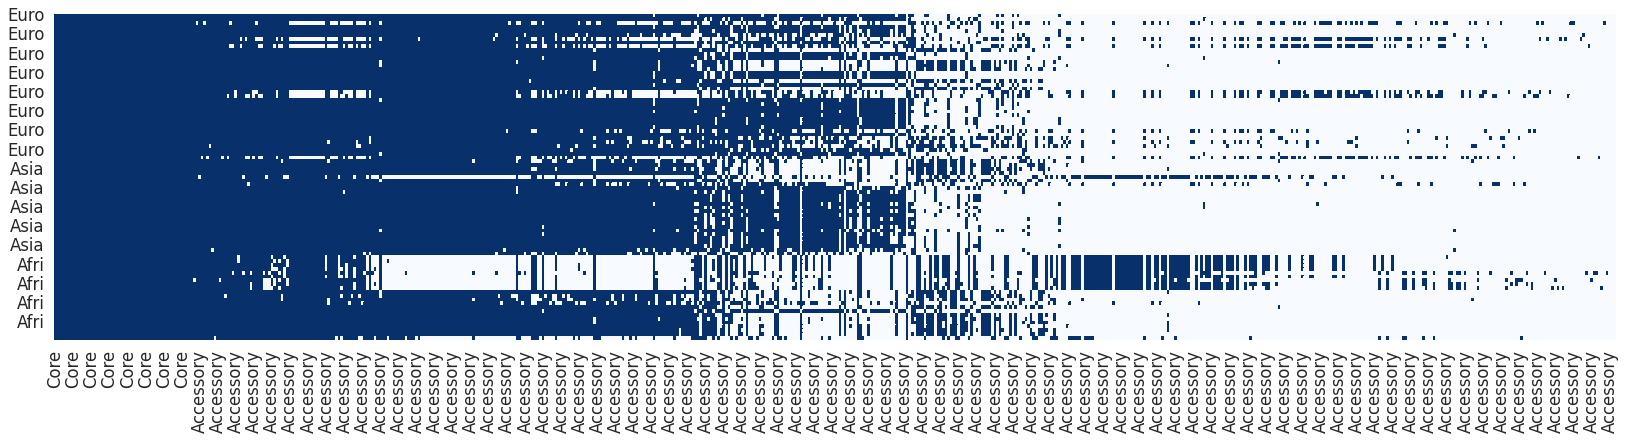

In [ ]:
plt.figure(figsize=(28, 6))
sns.heatmap(total.sort_index(ascending=False), cbar = False, cmap = 'Blues')
sns.set(font_scale = 1.5)

- Dendrogram과 비교 분석을 위한 distribution
- index는 continent가 아닌 genome

(89, 605)


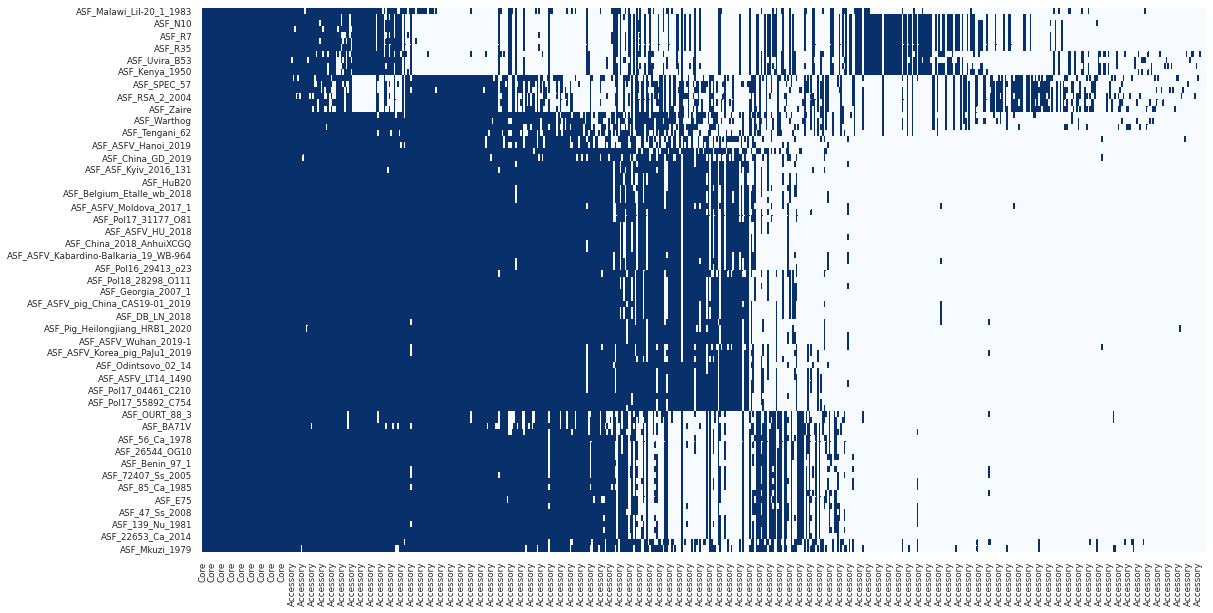

In [ ]:
conti_name = ortholog_conti_
gene_name = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/논문/otholog.csv", header=1)
new_index_list = []
for i in conti_df.index:
  ii = i.split('_')[:2]
  new_index_list.append("_".join(ii))
conti_df.index = new_index_list
gene_name.index = new_index_list
conti_name.index = new_index_list
exp = gene_name.T
exp = exp.loc[exp.sum(1).sort_values(ascending=False).index, :]
gene_name = exp.T
a = gene_name.sum(1) == 89 
core = gene_name.loc[a]
b = a == False
acc = gene_name.loc[b]
acc = acc.loc[acc.sum(1).sort_values(ascending=False).index, :]
core = core.T
acc = acc.T
core.columns = ['Core']*54
acc.columns = ['Accessory']*551
total = pd.concat([core, acc],axis=1)
print(total.shape)
total = total.loc[ivl_list[4],:]
plt.figure(figsize=(18, 10))
sns.set(font_scale = 0.8)
sns.heatmap(total, cbar = False, cmap = 'Blues')

# NCBI Blast Crawling

In [ ]:
from Bio.Blast import NCBIWWW
from Bio import SeqIO
from Bio.Blast import NCBIXML

In [ ]:
#afri_list, asia_list, euro_list = gene_count_only(60,20)
cnt, gene_list, conti_list = gene_count(80, 25) # 80 25
#afri_list, asia_list, euro_list, 
len(gene_list), gene_list, conti_list

(18, Index(['Ortholog_102', 'Ortholog_11', 'Ortholog_119', 'Ortholog_144',
        'Ortholog_163', 'Ortholog_186', 'Ortholog_211', 'Ortholog_215',
        'Ortholog_223', 'Ortholog_249', 'Ortholog_250', 'Ortholog_258',
        'Ortholog_259', 'Ortholog_305', 'Ortholog_37', 'Ortholog_430',
        'Ortholog_554', 'Ortholog_580'],
       dtype='object'), [['Asia', 'Euro'],
  ['Asia', 'Euro'],
  ['Asia', 'Euro'],
  ['Afri'],
  ['Asia', 'Euro'],
  ['Asia', 'Euro'],
  ['Asia', 'Euro'],
  ['Asia', 'Euro'],
  ['Afri'],
  ['Asia', 'Euro'],
  ['Asia', 'Euro'],
  ['Asia', 'Euro'],
  ['Afri'],
  ['Asia', 'Euro'],
  ['Asia', 'Euro'],
  ['Asia', 'Euro'],
  ['Asia', 'Euro'],
  ['Asia', 'Euro']])

In [ ]:
record = SeqIO.parse("/content/gdrive/My Drive/Colab Notebooks/논문/ASF_CDS_FiltIn_self_p95_s5_h0_Concs_MaxLeng.fasta", format="fasta")
cnt = 0
key_list = []
value_list = []
for seq in record:
  ortholog_name = seq.format("fasta").split('\n')[0].split('>')[1]
  if (ortholog_name in list(gene_list)) == True:
    print(ortholog_name, '\n')
    key_list.append(ortholog_name)
    protein_list = []
    result_handle = NCBIWWW.qblast("blastx", "nr", seq.format("fasta"))
    blast_records = NCBIXML.parse(result_handle) 
    E_VALUE_THRESHOLD = 1E-4
    for blast_record in blast_records: 
        for alignment in blast_record.alignments: 
            for hsp in alignment.hsps: 
                if hsp.expect < E_VALUE_THRESHOLD: 
                    a = alignment.title
                    b = a.split("[")[0]
                    protein = b.split('|')[-1]    
                    protein = protein.strip()
                    protein_list.append(protein)
                    print(protein)
    value_list.append(protein_list)
    print('========================')

In [ ]:
key_list = np.array(key_list)
value_list = np.array(value_list)
np.savez("/content/gdrive/My Drive/Colab Notebooks/논문/ortholog_protein.npz", x=key_list, y=value_list)

In [ ]:
ortholog_protein = np.load("/content/gdrive/My Drive/Colab Notebooks/논문/ortholog_protein.npz" , allow_pickle=True)
ortholog_protein['x'], ortholog_protein['y']

(array(['Ortholog_102', 'Ortholog_11', 'Ortholog_119', 'Ortholog_144',
        'Ortholog_163', 'Ortholog_186', 'Ortholog_211', 'Ortholog_215',
        'Ortholog_223', 'Ortholog_249', 'Ortholog_250', 'Ortholog_258',
        'Ortholog_259', 'Ortholog_305', 'Ortholog_37', 'Ortholog_430',
        'Ortholog_554', 'Ortholog_580'], dtype='<U12'),
 array([list(['MGF_360-4L', 'hypothetical protein IM014_gp034', 'MGF_360-4L', 'MGF_360-4L', 'MGF_360-4L protein', 'RecName: Full=Protein MGF 360-4L', 'pMGF 360-4L', 'pMGF 360-4L', 'MGF 360-4L', 'MGF_360-4L', 'RecName: Full=Protein MGF 360-4L', 'MGF 360-4L', 'RecName: Full=Protein MGF 360-4L', 'MGF 360-4L', 'MGF 360-4L', 'MGF 360-4L', 'RecName: Full=Protein MGF 360-4L', 'MGF 360-4L CDS', 'pMGF 360-4L', 'pMGF 360-4L', 'MGF 360-6L', 'MGF 360-6L', 'hypothetical protein IM014_gp037', 'MGF 360-7L', 'RecName: Full=Protein MGF 360-6L', 'pMGF 360-6L', 'MGF_360-6L', 'MGF 360-6L', 'RecName: Full=Protein MGF 360-5L', 'RecName: Full=Protein MGF 360-7L', 'RecName:

In [ ]:
ortholog_protein['x'] #  + 'Ortholog_42'

array(['Ortholog_102', 'Ortholog_11', 'Ortholog_119', 'Ortholog_144',
       'Ortholog_163', 'Ortholog_186', 'Ortholog_211', 'Ortholog_215',
       'Ortholog_223', 'Ortholog_249', 'Ortholog_250', 'Ortholog_258',
       'Ortholog_259', 'Ortholog_305', 'Ortholog_37', 'Ortholog_430',
       'Ortholog_554', 'Ortholog_580'], dtype='<U12')

In [ ]:
prot_fun_dict = {'Ortholog_102' : 'Plays a role in virus cell tropism, and may be required for efficient virus replication in macrophages',
                     'Ortholog_11' : 'Plays a role in virus cell tropism, and may be required for efficient virus replication in macrophages',
                     'Ortholog_119' : 'Envelope protein', 
                     'Ortholog_144' : 'Plays a role in virus cell tropism, and may be required for efficient virus replication in macrophages',
                     'Ortholog_163' : 'Late protein',
                     'Ortholog_186' : 'Transmembrane protein',
                     'Ortholog_211' : 'Plays a role in virus cell tropism, and may be required for efficient virus replication in macrophages',
                     'Ortholog_215' : 'Uncharacterized protein', # https://www.uniprot.org/uniprot/Q65172
                     'Ortholog_223' : 'Catalysis of the hydrolysis of ester linkages within nucleic acids', #https://www.uniprot.org/uniprot/P0CAF6
                     'Ortholog_249' : 'Uncharacterized protein', #https://www.uniprot.org/uniprot/A0A097SRV6
                     'Ortholog_250' : 'Plays a role in virus cell tropism, and may be required for efficient virus replication in macrophages',
                     #'Ortholog_258' : 'X',
                     'Ortholog_259' : 'Plays a role in virus cell tropism, and may be required for efficient virus replication in macrophages',
                     'Ortholog_305' : 'Plays a role in virion morphogenesis by recruiting and transforming the host ER membranes into the precursors of the viral envelope', #https://www.uniprot.org/uniprot/Q65194
                     'Ortholog_37' : 'Uncharacterized protein', # https://www.uniprot.org/uniprot/P0CA29
                     'Ortholog_42' : 'Plays a role in virus cell tropism, and may be required for efficient virus replication in macrophages',
                     'Ortholog_430' : 'ATP-dependent RNA helicase', #https://www.uniprot.org/uniprot/Q89525
                     'Ortholog_554' : 'Contribute to modulate HNRNPK functions related to processing and export of mRNAs during ASFV infection', #Modifies the subcellular distribution of heterogeneous nuclear ribonucleoprotein K (HNRNPK) and may 
                     'Ortholog_580' : 'Plays a role in virus cell tropism, and may be required for efficient virus replication in macrophages.',
}
len(prot_fun_dict), len(conti_list)

(18, 18)

In [ ]:
conti_list

[['Asia', 'Euro'],
 ['Asia', 'Euro'],
 ['Asia', 'Euro'],
 ['Afri'],
 ['Asia', 'Euro'],
 ['Asia', 'Euro'],
 ['Asia', 'Euro'],
 ['Asia', 'Euro'],
 ['Afri'],
 ['Asia', 'Euro'],
 ['Asia', 'Euro'],
 ['Asia', 'Euro'],
 ['Afri'],
 ['Asia', 'Euro'],
 ['Asia', 'Euro'],
 ['Asia', 'Euro'],
 ['Asia', 'Euro'],
 ['Asia', 'Euro']]

In [ ]:
c = ['Asia']*3 + ['Africa'] + ['Asia']*4 +['Africa'] +['Asia']*3 + ['Africa']+ ['Asia'] + ['Africa'] + ['Asia']*3
# c <-> prot_fun_dict.value
fun_distribution_df = pd.DataFrame(list(zip(c,list(prot_fun_dict.values()))),columns=['continent', 'function'])
stack_df = fun_distribution_df[fun_distribution_df['continent'] == 'Asia']
stack_df['continent'] = 'Europe'
df = pd.concat([stack_df,fun_distribution_df])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


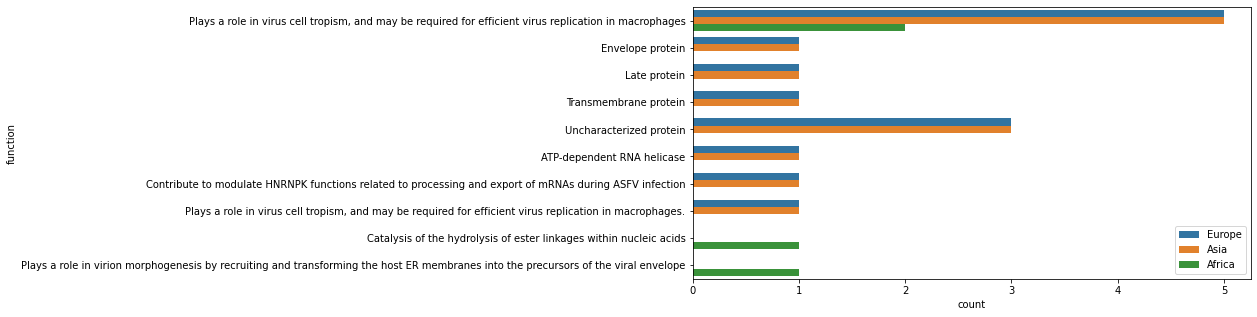

In [ ]:
#fun_distribution_df = pd.DataFrame(list(zip(c,list(prot_fun_dict.values()))),columns=['continent', 'function'])
#fun_distribution_df['y'] = [1]*18
import seaborn as sns
import matplotlib.pyplot as plt


#plt.figure(figsize=(28, 15))
#sns.countplot(y='continent',hue='function', data=df)

plt.figure(figsize=(10, 5))
sns.countplot(y='function',hue='continent', data=df)
plt.legend(loc = 'lower right')